# Sağlık sigortası ücret tahmini

İnsanların yaş, VKİ, cinsiyet, sigara alışkanlığı, çocuk sayısı ve yaşadıkları bölgeye göre(USA) sağlık sigortalarının isteyecekleri ücreti tahmin edelim.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dataprep.eda import *
from dataprep.datasets import load_dataset, get_dataset_names
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report


In [93]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


Verimizi import edelim.

In [118]:
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/insurance.csv")


In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
description_style = df.describe().style
styled_description = description_style.set_properties(**{'background-color': 'lightyellow',
                                                         'color': 'black',
                                                         'border-color': 'black'})
styled_description


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


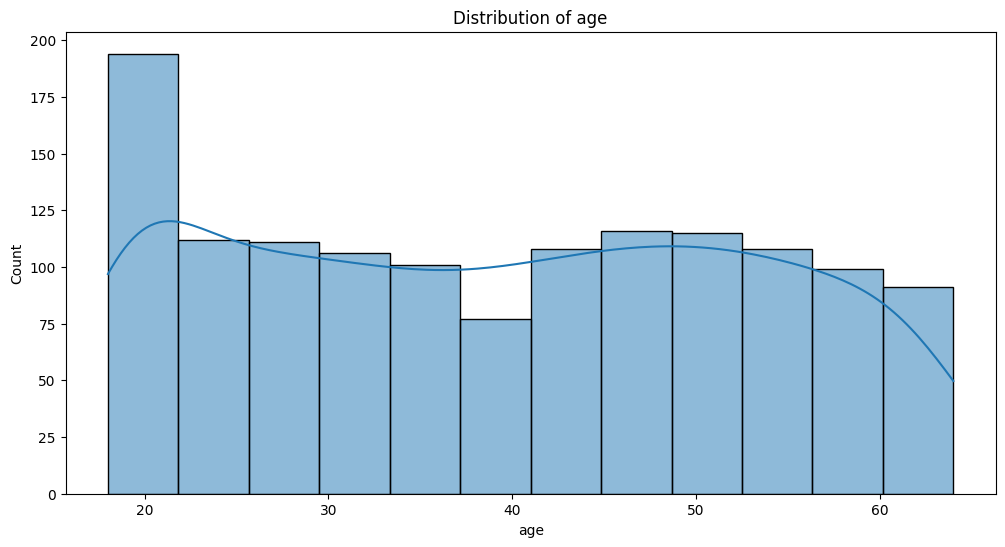

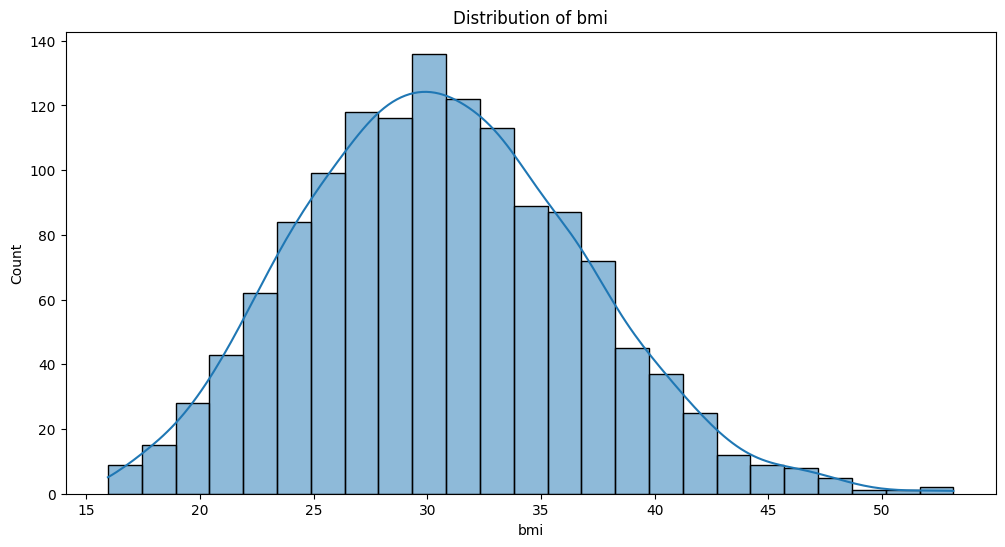

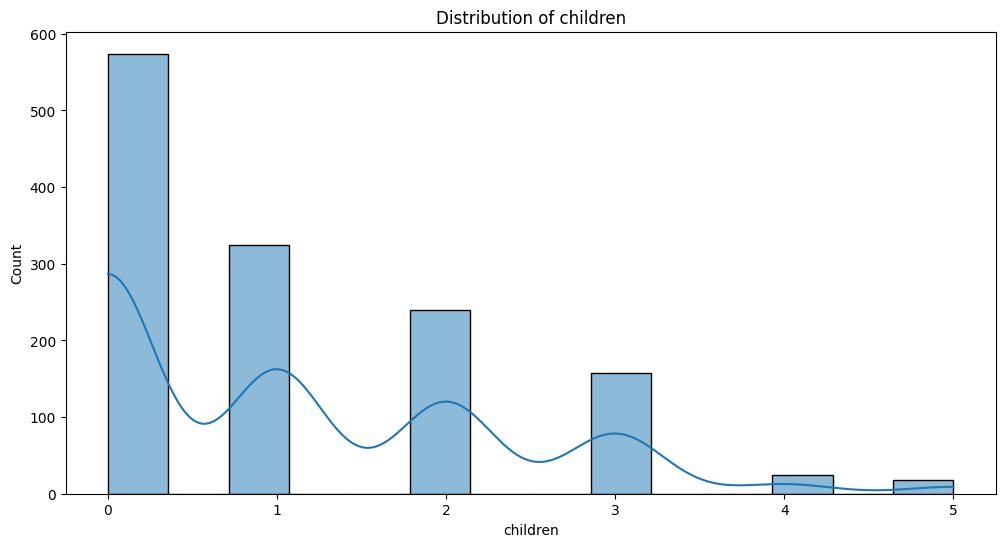

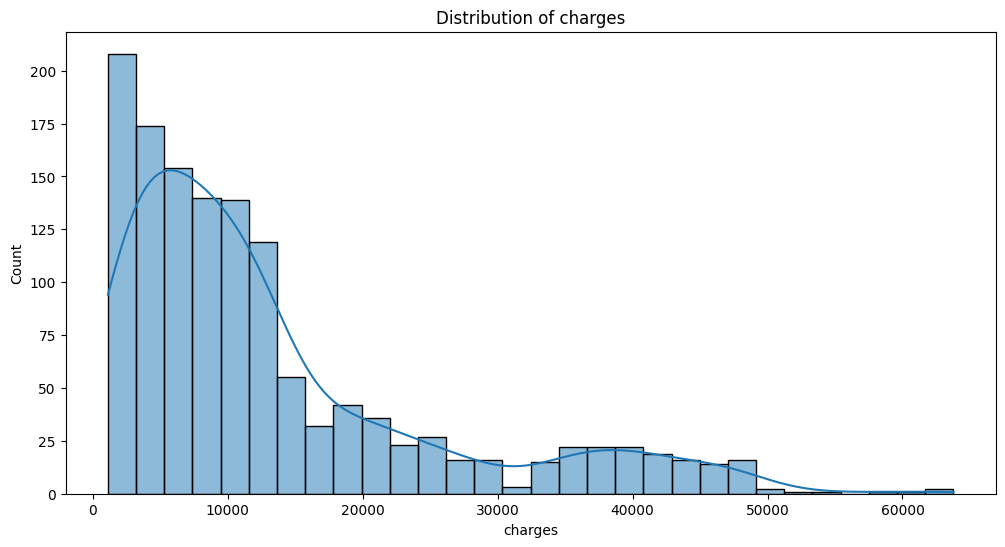

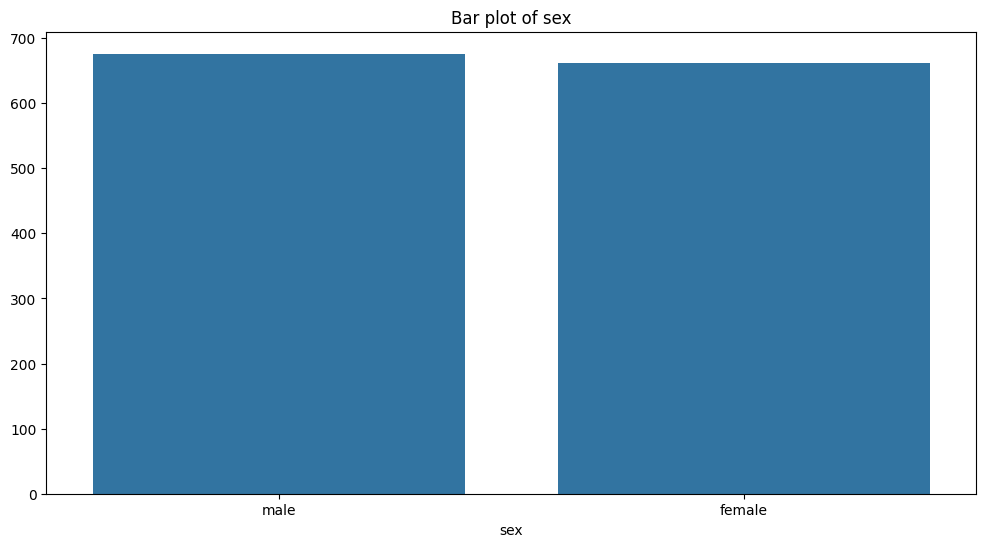

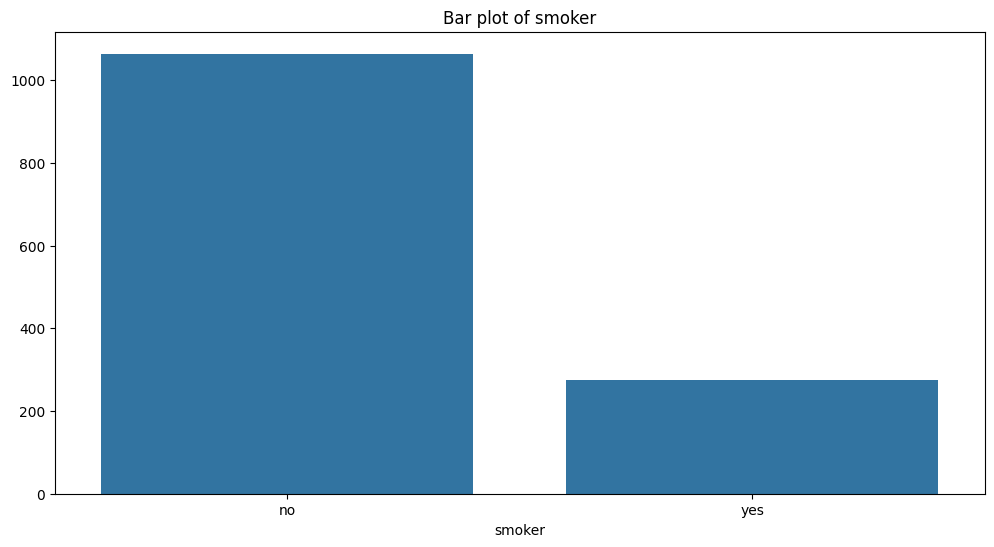

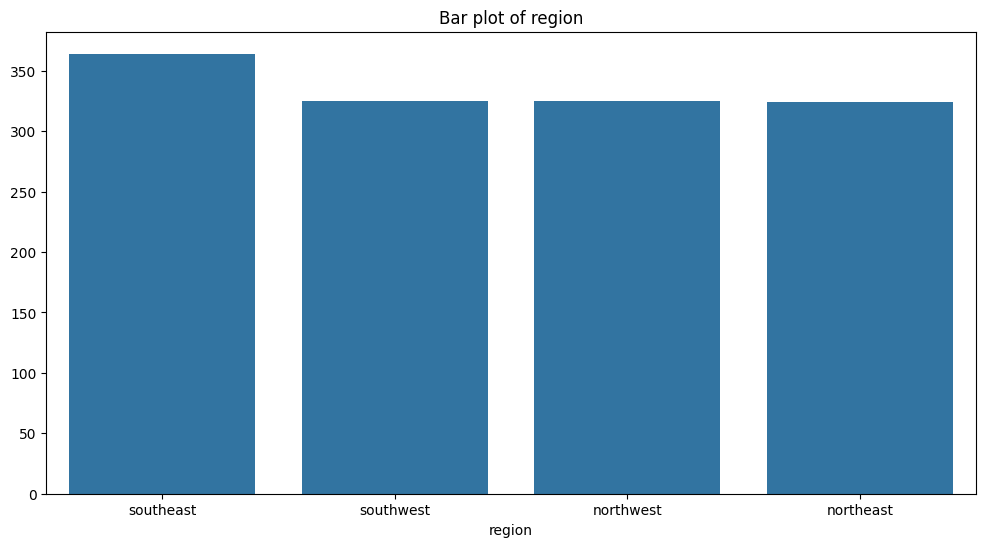

In [116]:
# Visualize all variables in the dataframe

# Numerical variables
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(12, 6))
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col], kde=True)
    plt.show()

# Categorical variables
for col in df.select_dtypes(exclude=np.number):
    plt.figure(figsize=(12, 6))
    plt.title(f"Bar plot of {col}")
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.show()


### **Distribution of age:** Grafikten anlaşıldığı üzere, verimizde 20-23 yaş aralığındaki insan sayısı diğerlerine göre biraz daha fazla, bunun dışında yaş dağılımı eşit diyebiliriz.

### **Distribution of bmi:** Dağılımın normal dağılıma benzediği görülüyor, ancak sağlıklı bir insanın bmi değer aralığı 18.5 - 25 olduğu düşünülürse verimizdeki insanların büyük çoğunluğunun obezite riski taşıdğını söyleyebiliriz.

### **Distribution of children:** Verimizdeki insanların çoğunluğunun çocuk sahibi olduğunu söyleyebiliriz. İnsanları çocuğu olanlar ve olmayanlar şeklinde ikiye ayırırsak birbirine yakın sayılarda olduğunu gözlemliyoruz.

### **Distribution of charges:** Verimizdeki sigorta ücretlerinin büyük oranda 0-12500$ aralığında olduğunu görüyoruz. İnsanların çoğunun sağlıklı olduğunu düşünürsek, bundan daha yüksek değerlerin sağlık riski yüksek kişilere ait olduğu çıkarmını yapıyoruz.

### **Distribution of sex:** Erkeklerin sayısının çok az bir farkla daha fazla olduğu görülüyor. Cinsiyet dağılımı eşit diyebiliriz.

### **Bar plot of smokers:** Verimizdeki insanların büyük çoğunluğunun sigara kullanmadığını görüyoruz.

### **Distribution of regions:** İnsanların yaşadıkları bölgelerin eşit dağıldığını görüyoruz.



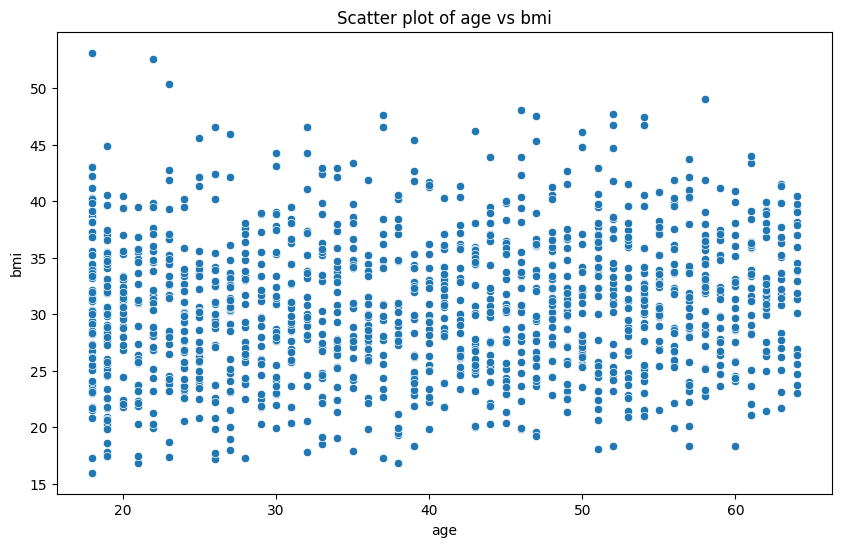

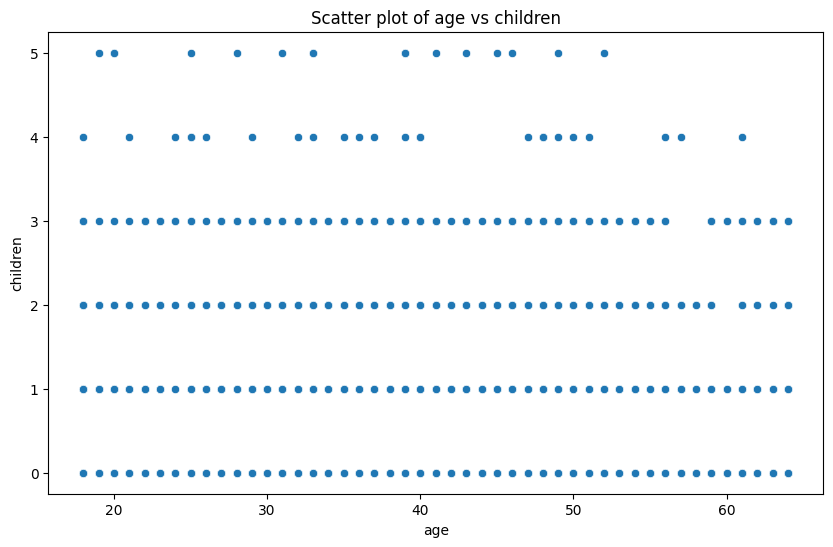

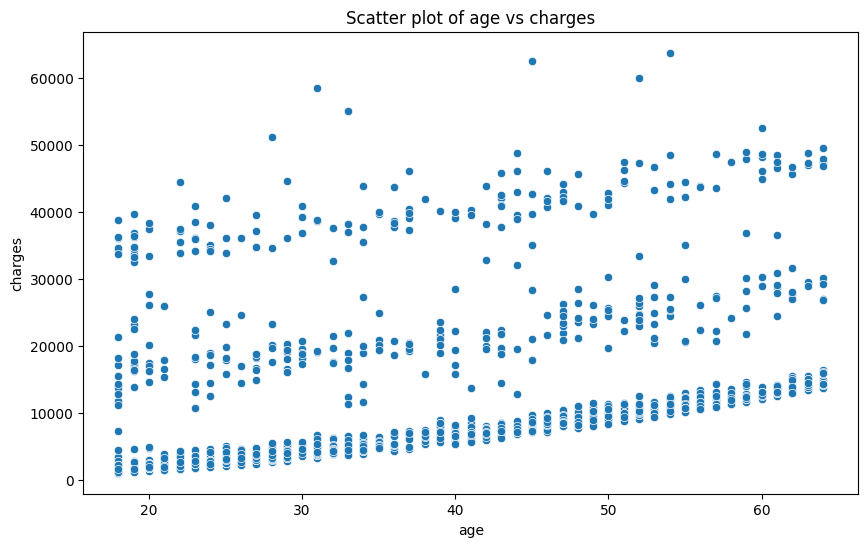

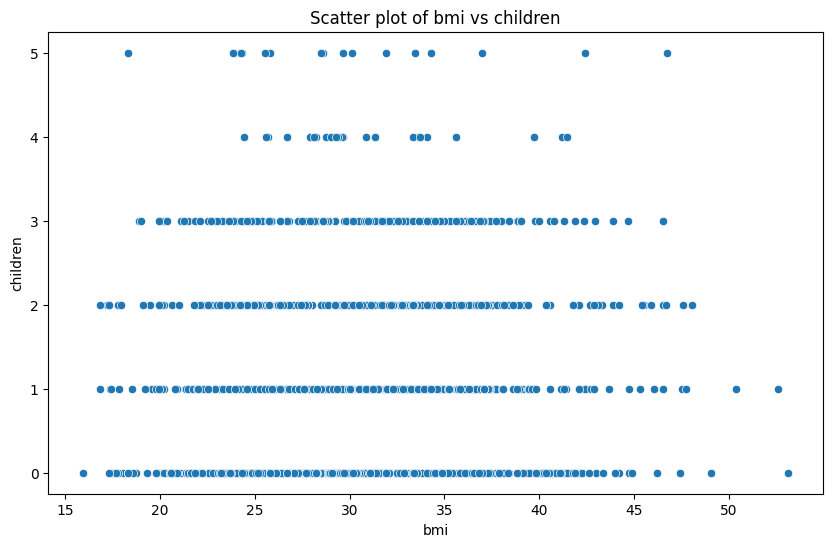

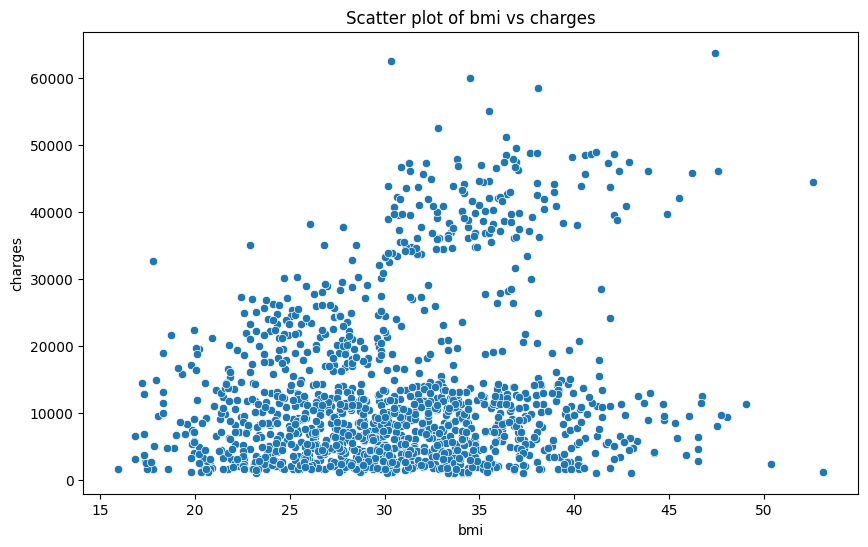

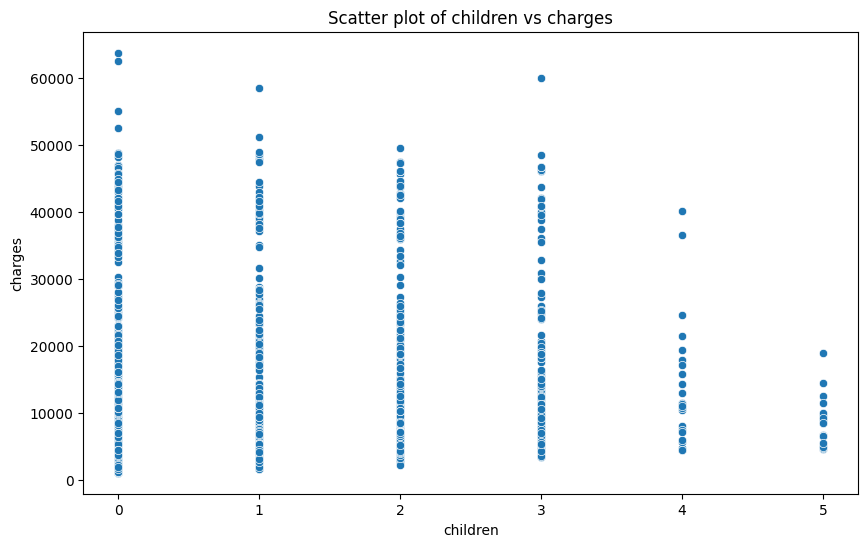

In [49]:
# prompt: use scatter plot to visualize all variables in dataframe

# Scatter plot for all numerical variables
for i, col1 in enumerate(df.select_dtypes(include=np.number).columns):
    for col2 in df.select_dtypes(include=np.number).columns[i + 1:]:
        plt.figure(figsize=(10, 6))
        plt.title(f"Scatter plot of {col1} vs {col2}")
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.show()


### **Scatter plot of age vs bmi:** Bu grafikten yaş ve vki verisinin oldukça dengeli dağıldığını görüyoruz. Verimli bir makine öğrenmesi için olumlu.

### **Scatter plot of age vs children:** Bu grafikten insanların yaşları ve çocuk sayılarının neredeyse eşit dağıldığını görüyoruz. Her yaştan insanın çocuk sayısına göre dağılımı eşit diyebiliriz.

### **Scatter plot of age vs charges:** Bu grafikte sigorta ücretlerinin büyük çoğunluğunun 0-20000$ aralığında bulunduğunu görüyoruz. Dağılım dengeli görünüyor. Yaş arttıkça ücretlerin de doğrusal olarak arttığını gözlemleyebiliyoruz.

### **Scatter plot of bmi vs children:** Verilerin çok büyük kısmının 20-40 bmi ve 0-15000$ aralığında toplandığını görüyoruz. BMI değeri arttıkça ortalamanın çok üstünde sigorta ücretlerinin çıkarıldığını gözlemliyoruz. BMI değerinin insanın sağlık riskiyle korele olduğu çıkarımını yapabiliriz.

### **Scatter plot of children vs charges:** İnsanların çocuk sayısıyla sigorta ücretlerinin eşit dağıldığını gözlemliyoruz. Kişinin çocuk sayısıyla sağlık riski arasında korelasyon bulunmadığı yorumunu yapabiliz.

Verimizi daha iyi analiz edebilmek için kategorik değerlerimizi **encoding** kullanarak numerik değere çeviriyoruz.

In [120]:
# prompt: create a copy of dataframe and use encoding to convert all variables to numeric

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
df_encoded.info()
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92
1,18,1,33.77,1,0,2,1725.55
2,28,1,33.00,3,0,2,4449.46
3,33,1,22.70,0,0,1,21984.47
4,32,1,28.88,0,0,1,3866.86


Veriyi yorumlayabilmek için Korelasyon Matriksi çizdiriyoruz.

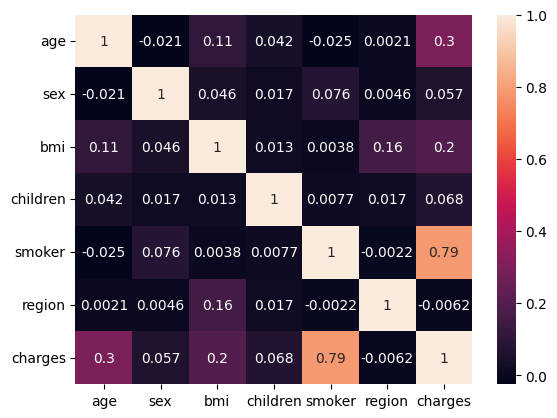

In [101]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Matriksi incelediğimizde özelliklerimizin neredeyse hiçbirinin birbirine korele olmadığını gözlemliyoruz. Veri setimizde birbirine yüksek korelasyonu olan verilerin bulunmaması, yani gereksiz özelliğimizin bulunmaması, verimli bir model eğitimi açısından olumlu. Hedef veri olan ücretler ile kayda değer korelasyonu olan 3 tane özelliğimiz var:

*   **Age:** Sağlık sigorta ücreti ile yaş arasında %30 oranında korelasyon bulunuyor. İnsanın yaşı arttıkça sağlık risklerinin de arttığı yorumunu yapabiliriz.
*   **BMI:** Ücret ile BMI verisinin %20 oranında korele olduğunu görüyoruz. Kişinin Vücut Kitle Endeksi arttıkça sağlık risklerinin arttığı yorumunu yapabiliriz.
*   **Smoker:** Sigara alışkanlığı ile sigorta ücretleri arasında %79 gibi çok ciddi bir korelasyon oranı olduğunu görüyoruz. Bu durumda verimizdeki ortalamanın çok üstündeki ücretlerin sigara içen kişilere ait olduğu yorumunu yapabiliriz. Ayrıca sigara içmenin sağlık risklerini çok fazla arttırdığı çıkarımını da yaparız.






# Özellik Mühendisliği


Aykırı değerleri(outlier) görsel olarak göstermek için IQR grafikleri çizdiriyoruz.

**IQR (Interquartile Range)**, bir veri setindeki değerlerin orta %50'sinin kapsadığı aralığı gösteren bir istatistiksel ölçüdür.

Başka bir deyişle, IQR, veri setinin orta %50'sinin alt ve üst sınırlarını belirler.

IQR, veri setindeki aşırı değerlere karşı daha dirençlidir ve ortalama gibi diğer istatistiksel ölçümlere göre daha sağlam bir istatistiksel göstergedir.

**IQR'ı Yorumlama:**

IQR ne kadar küçükse, veri seti o kadar homojendir.

IQR ne kadar büyükse, veri seti o kadar heterojendir.

IQR'ın dışındaki değerler aşırı değerler olarak kabul edilebilir.

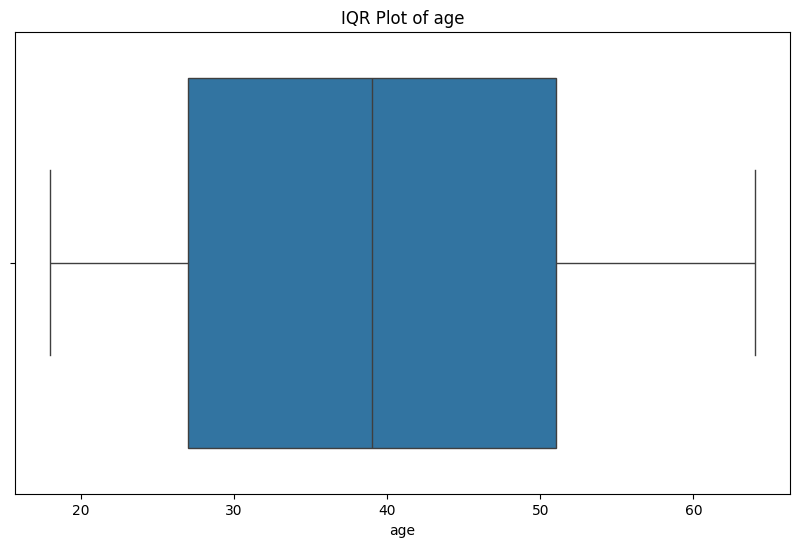

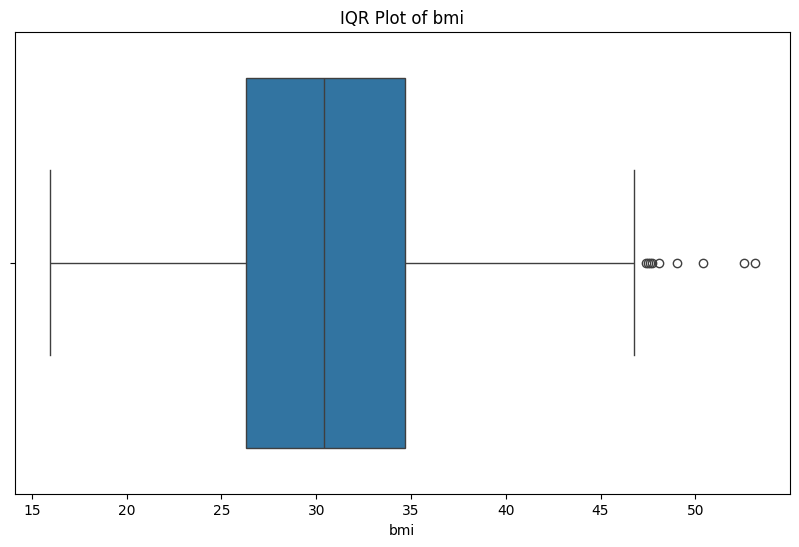

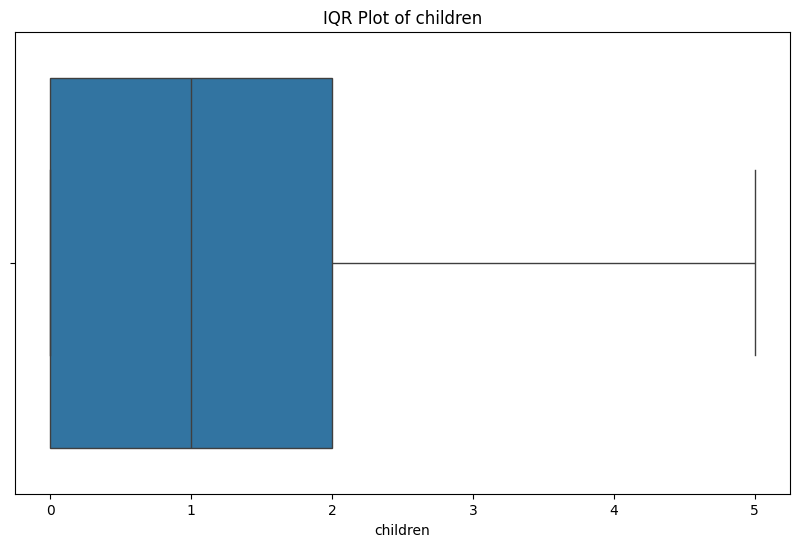

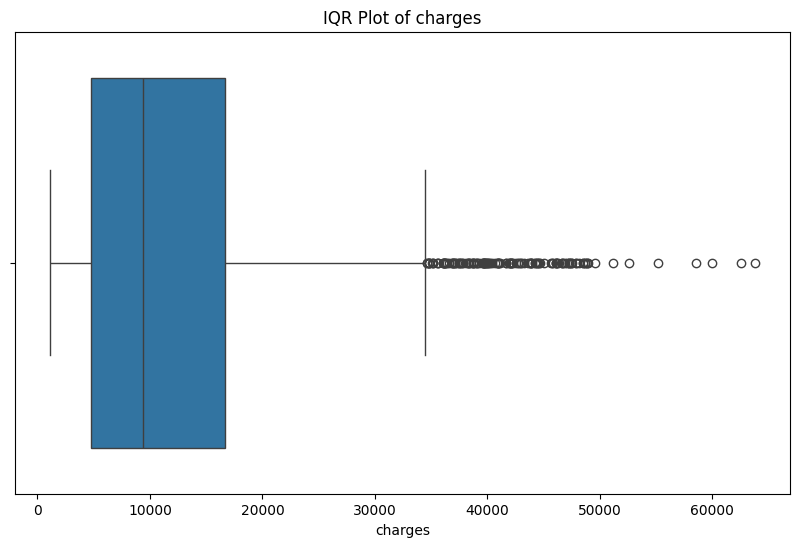

In [84]:
# prompt: draw IQR graph of dataframe

for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(10, 6))
    plt.title(f"IQR Plot of {col}")
    sns.boxplot(x=df[col])
    plt.show()


### **IQR Plot of Charges:** Ücret verisinde aykırı değerlerin oldukça fazla olduğunu görüyoruz. Fakat bunları silmiyoruz çünkü sigorta şirketinin ücretleri belirlerken kullandığı algoritmayı anlayabilmemiz için önem arz ediyorlar. Hastalanma ihtimali yüksek kişilere ortalamanın 4 katı ücretler çıkarılması algoritmanın lineer olmadığını gösteriyor.

Verimize "obezite riski" adında yeni bir özellik ekleyelim. Bu veriyi VKİ ve yaş özelliklerini kullanarak çıkaralım.

In [121]:
# Dünya Sağlık Örgütü (WHO) sınıflandırmasını kullanarak obezite riski kategorilerini belirleyin
def obezite_riski_kategorisi(age, bmi):
    if bmi < 18.5:
        if age >= 65:
            return "Low Risk"
        else:
            return "Medium Risk"
    elif 18.5 <= bmi < 25:
        return "Low Risk"
    elif 25 <= bmi < 30:
        return "Medium Risk"
    else:
        return "High Risk"

# Yeni "obezite_riski" sütununu ekleyin
df["obesity_risk"] = df.apply(lambda row: obezite_riski_kategorisi(row["age"], row["bmi"]), axis=1)

# Sonuçları inceleyin
print(df["obesity_risk"].value_counts())
df.head()


obesity_risk
High Risk      707
Medium Risk    406
Low Risk       225
Name: count, dtype: int64


,age,sex,bmi,children,smoker,region,charges,obesity_risk
0,19,female,27.90,0,yes,southwest,16884.92,Medium Risk
1,18,male,33.77,1,no,southeast,1725.55,High Risk
2,28,male,33.00,3,no,southeast,4449.46,High Risk
3,33,male,22.70,0,no,northwest,21984.47,Low Risk
4,32,male,28.88,0,no,northwest,3866.86,Medium Risk


Yukarıda BMI dağılım grafiğini incelerken gözlemlediğimiz üzere, verimizdeki insanların büyük çoğunluğu obez olma riski taşıyor.

Yeni özelliğimizi de encode edelim ki korelasyon analizi yapabilelim.

In [133]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   int8   
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   int8   
 5   region        1338 non-null   int8   
 6   charges       1338 non-null   float64
 7   obesity_risk  1338 non-null   int8   
dtypes: float64(2), int64(2), int8(4)
memory usage: 47.2 KB


,age,sex,bmi,children,smoker,region,charges,obesity_risk
0,19,0,27.90,0,1,3,16884.92,2
1,18,1,33.77,1,0,2,1725.55,0
2,28,1,33.00,3,0,2,4449.46,0
3,33,1,22.70,0,0,1,21984.47,1
4,32,1,28.88,0,0,1,3866.86,2


Correlation between obesity_risk and charges: -0.18


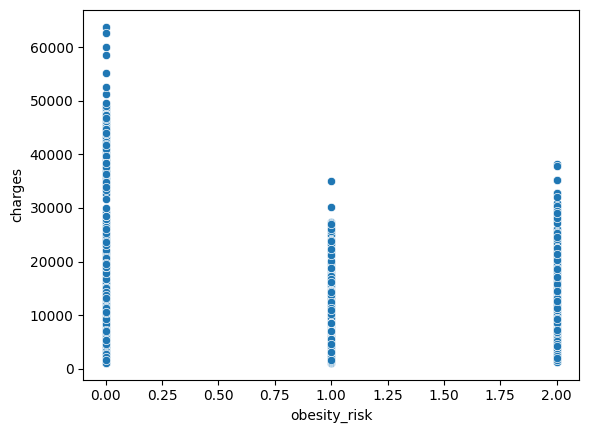

In [126]:
# Calculate the correlation between "obesity_risk" and "charges"
correlation = df_encoded["obesity_risk"].corr(df_encoded["charges"])

# Print the correlation
print(f"Correlation between obesity_risk and charges: {correlation:.2f}")

# Draw a scatter plot to visualize the correlation
sns.scatterplot(x=df_encoded["obesity_risk"], y=df_encoded["charges"])
plt.show()
